# Name : Thummala Sreekar Reddy

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
#reading data set
df = pd.read_csv('data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [3]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
x1    2222 non-null float64
x2    2224 non-null float64
y     2227 non-null int64
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [5]:
# Number of obeservations in each class
df['y'].value_counts()

0    1242
1     985
Name: y, dtype: int64

In [6]:
#Number of missing values in each feature
df.isnull().sum()

x1    5
x2    3
y     0
dtype: int64

In [7]:
#Filling missing values in 'X1' with mean
df['x1'].fillna(df['x1'].mean(),inplace=True)

In [8]:
#Filling missing values in 'X2' with mean
df['x2'].fillna(df['x2'].mean(),inplace=True)

In [9]:
#Checking for any missing values again
df.isnull().sum()

x1    0
x2    0
y     0
dtype: int64

(array([181., 276., 284., 236., 197., 157., 285., 250., 209., 152.]),
 array([-1.34369160e+02, -1.07481376e+02, -8.05935909e+01, -5.37058061e+01,
        -2.68180213e+01,  6.97634500e-02,  2.69575482e+01,  5.38453330e+01,
         8.07331178e+01,  1.07620903e+02,  1.34508687e+02]),
 <BarContainer object of 10 artists>)

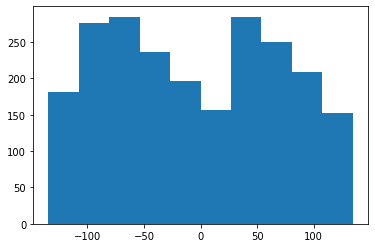

In [10]:
plt.hist(df['x1'])

(array([2.225e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-1.34876132e+02,  9.99987851e+06,  1.99998919e+07,  2.99999053e+07,
         3.99999187e+07,  4.99999321e+07,  5.99999454e+07,  6.99999588e+07,
         7.99999722e+07,  8.99999856e+07,  9.99999990e+07]),
 <BarContainer object of 10 artists>)

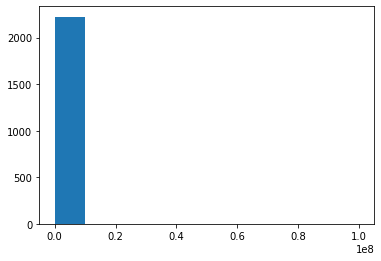

In [11]:
plt.hist(df['x2'])

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
df[['x1', 'x2']] = scaler.fit_transform(df[['x1', 'x2']])

In [13]:
#shape of data set before removing outliers
df.shape

(2227, 3)

<AxesSubplot:xlabel='x2'>

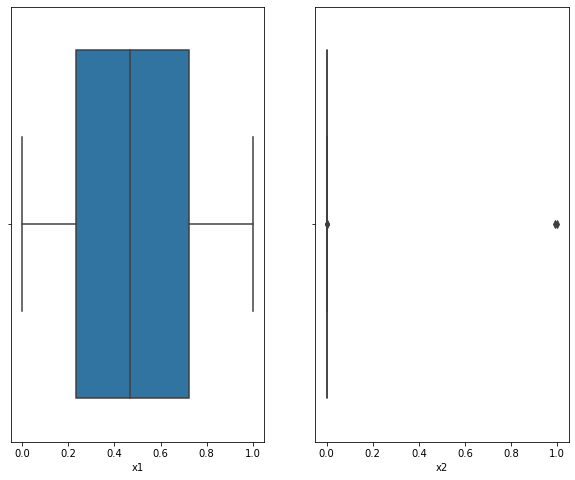

In [14]:
# Visualising the each feature in the dataset to see if their are any outliers
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
sns.boxplot(df['x1'], ax=axs[0])
sns.boxplot(df['x2'],ax=axs[1])

In [15]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low)
                       & (df_in[col_name] < fence_high)]
    return df_out

In [16]:
for var in ['x1', 'x2']:
    df_modified = remove_outlier(df, var)

In [17]:
df_modified.shape, df.shape

((2222, 3), (2227, 3))

<AxesSubplot:xlabel='x2'>

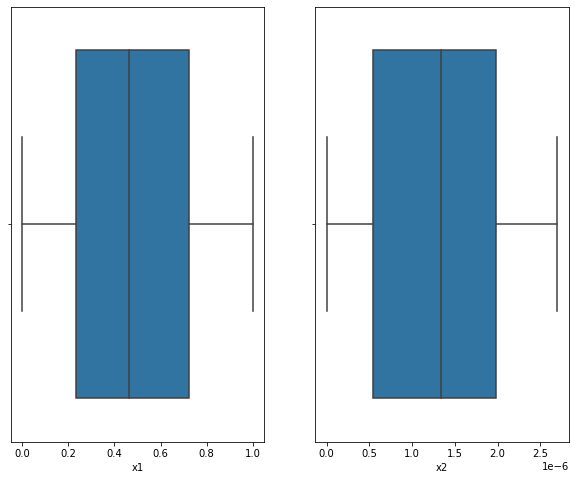

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
sns.boxplot(df_modified['x1'], ax=axs[0])
sns.boxplot(df_modified['x2'],ax=axs[1])

In [19]:

from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = df.drop("y",axis=1)
Targeted_feature = df["y"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1781, 2), (446, 2), (1781,), (446,))

## Logistic Regression

### Base Logistic Regression without any Hyperparameter Tunning

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 59.64
The cross validated score for Logistic REgression is: 46.71


Text(0.5, 1.05, 'Confusion_matrix')

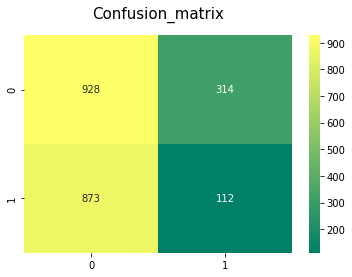

In [20]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Finding best parameters for Logistic Regression using GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression(n_jobs=-1)
param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
              'penalty':['l1','l2'],
              'C':[0.1, 0.2,0.3,0.4]
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)

# Best score
print("Best Score : ",modelf.best_score_)

print("Best parameter : ",modelf.best_params_)

# Best Estimator
print("Best Estimator : ",modelf.best_estimator_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:    4.6s finished


Best Score :  0.5794771200803465
Best parameter :  {'C': 0.4, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator :  LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


### Fitting Logistic Regression with best Hyper Parameters found through GridSearch

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 59.19
The cross validated score for Logistic REgression is: 47.43


Text(0.5, 1.05, 'Confusion_matrix')

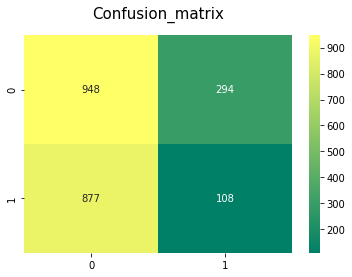

In [22]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression(C=0.4,solver='newton-cg',penalty='l2')
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## SVC with Linear Kernel

### Fitting Base SVC with Linear Kernel with default parameters.

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       242
           1       0.00      0.00      0.00       204

    accuracy                           0.54       446
   macro avg       0.27      0.50      0.35       446
weighted avg       0.29      0.54      0.38       446



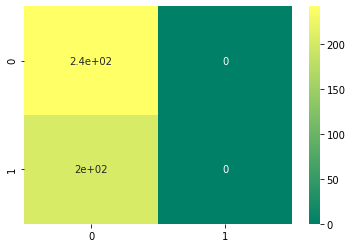

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='summer',annot=True)
print(classification_report(y_test,y_pred))

### Finding best parameters for Linear kernel SVC using GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'kernel':['linear'],
              'max_iter':[50,100,150,200],
              'C':[10.0,5.0,2.0,1.0]
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(X_train,y_train)

# Best score
print("Best Score : ",modelf.best_score_)

print("Best parameter : ",modelf.best_params_)

# Best Estimator
print("Best Estimator : ",modelf.best_estimator_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.0s


Best Score :  0.5435126482957755
Best parameter :  {'C': 1.0, 'kernel': 'linear', 'max_iter': 200}
Best Estimator :  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=200, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    2.3s finished


### Fitting Linear kernel SVC with best Hyper Parameters found through GridSearch

--------------The Accuracy of the model----------------------------
The accuracy of the SVC with Linear kernel is 51.79
The cross validated score for SVC with Linear kernel is: 42.77


Text(0.5, 1.05, 'Confusion_matrix')

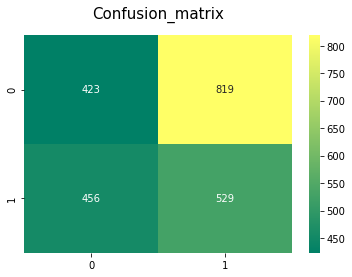

In [25]:
model = SVC(C=1.0,kernel='linear',max_iter=200)
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the SVC with Linear kernel is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svc_linear=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for SVC with Linear kernel is:',round(result_svc_linear.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## SVC with RBF kernel

### Fitting Base SVC with RBF Kernel with default parameters.

--------------The Accuracy of the model----------------------------
The accuracy of the SVC with RBF kernel is 58.52
The cross validated score for RBF with Linear kernel is: 46.75


Text(0.5, 1.05, 'Confusion_matrix')

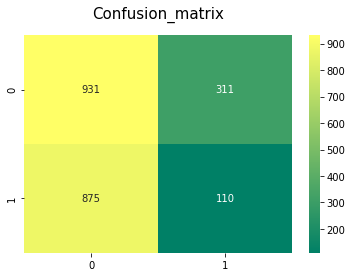

In [26]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the SVC with RBF kernel is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svc_rbf=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for RBF with Linear kernel is:',round(result_svc_rbf.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Finding best parameters for RBF kernel SVC using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
model = SVC()
param_grid = {'kernel':['rbf'],
              'max_iter':[80,100,110,120],
              'C':[300,250,150,100,90]
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

modelf.fit(X_train,y_train)

# Best score
print("Best Score : ",modelf.best_score_)

print("Best parameter : ",modelf.best_params_)

# Best Estimator
print("Best Estimator : ",modelf.best_estimator_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s


Best Score :  0.4958194714707175
Best parameter :  {'C': 250, 'kernel': 'rbf', 'max_iter': 100}
Best Estimator :  SVC(C=250, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


### Fitting RBF kernel SVC with best Hyper Parameters found through GridSearch

--------------The Accuracy of the model----------------------------
The accuracy of the SVC with RBF kernel is 50.22
The cross validated score for SVC with RBF kernel is: 48.47


Text(0.5, 1.05, 'Confusion_matrix')

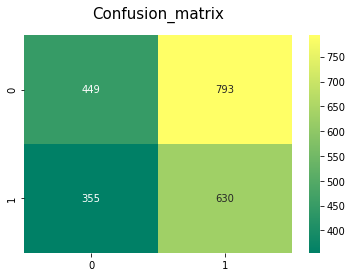

In [28]:
model = SVC(kernel='rbf',max_iter=100,C=250)
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the SVC with RBF kernel is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_svc_rbf=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for SVC with RBF kernel is:',round(result_svc_rbf.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Decision Tree

### Fitting Decision Tree with default hyper parameters

--------------The Accuracy of the model----------------------------
The accuracy of the Decision Tree is 92.15
The cross validated score for Decision Tree is: 90.8


Text(0.5, 1.05, 'Confusion_matrix')

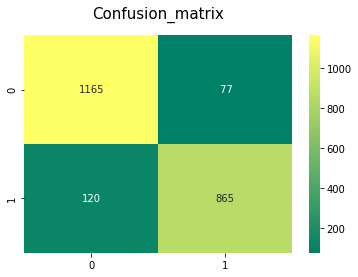

In [29]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Decision Tree is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_dt=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is:',round(result_dt.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Finding best Hyper parameters for Decision tree using gridSearch

In [30]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[5,10,20],'min_samples_split':[3,5,6,8,10],
              'min_samples_leaf':[5,8,10,12],'max_leaf_nodes':[20,25,50]
             }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

modelf.fit(X_train,y_train)

# Best score
print("Best Score : ",modelf.best_score_)

print("Best parameter : ",modelf.best_params_)

# Best Estimator
print("Best Estimator : ",modelf.best_estimator_)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3390 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:    5.2s finished


Best Score :  0.915218755884753
Best parameter :  {'criterion': 'gini', 'max_depth': 20, 'max_leaf_nodes': 50, 'min_samples_leaf': 5, 'min_samples_split': 3}
Best Estimator :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


### Fitting Decision tree with best hyper parameters found using gridsearch

--------------The Accuracy of the model----------------------------
The accuracy of the Decision Tree is 91.48
The cross validated score for Decision Tree is: 90.07


Text(0.5, 1.05, 'Confusion_matrix')

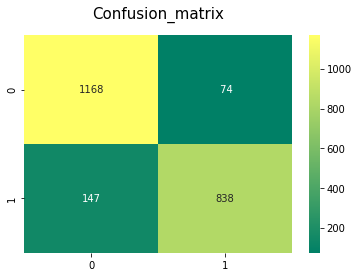

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=20,max_leaf_nodes= 50, min_samples_leaf=5,min_samples_split=3)
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Decision Tree is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_dt=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is:',round(result_dt.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## KNN

### Fitting KNN with default hyper parameters

--------------The Accuracy of the model----------------------------
The accuracy of the KNN is 56.95
The cross validated score for KNN is: 48.9


Text(0.5, 1.05, 'Confusion_matrix')

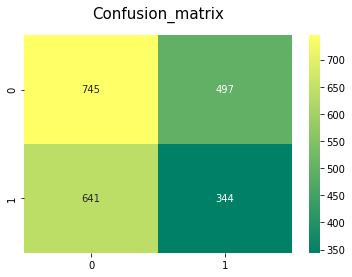

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the KNN is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for KNN is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

### Finding best hyper parameters for KNN using Grid Search

In [33]:
model = KNeighborsClassifier()
param_grid = {'n_neighbors':[15,20,25,30],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[1,2,3,4],
              'p':[0.8,1,1.1],
              'n_jobs':[-1],
             }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose = 1)

modelf.fit(X_train,y_train)

# Best score
print("Best Score : ",modelf.best_score_)

print("Best parameter : ",modelf.best_params_)

# Best Estimator
print("Best Estimator : ",modelf.best_estimator_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   17.6s


Best Score :  0.5693427907852614
Best parameter :  {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 30, 'p': 1}
Best Estimator :  KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=30, p=1,
                     weights='uniform')


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   20.5s finished


### Fitting KNN with best hyper parameters found through GridSearch

--------------The Accuracy of the model----------------------------
The accuracy of the KNN is 54.71
The cross validated score for KNN is: 47.06


Text(0.5, 1.05, 'Confusion_matrix')

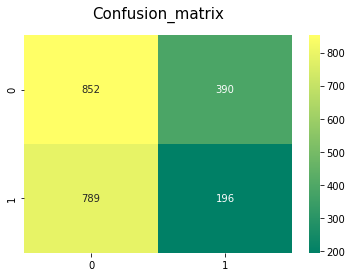

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm= 'auto', leaf_size=1, n_jobs=-1,n_neighbors=30,p=1)
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the KNN is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for KNN is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

## Final Models Evaluation

In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','SVC Linear','SVC RBF','Decision Tree', 'KNN'],
    'Score': [result_lr.mean(),result_svc_linear.mean(),result_svc_rbf.mean(),result_dt.mean(),result_knn.mean()]})
models.sort_values(by='Score',ascending=False).style.background_gradient('Blues')

,Model,Score
3,Decision Tree,0.900739
2,SVC RBF,0.484679
0,Logistic Regression,0.474254
4,KNN,0.470646
1,SVC Linear,0.427694


## Summary

** I have filled the missing values with Mean values. (I have tried various other values like median, mode. But finally choose mean as it performs well)

** I have used Boxplot to identify if their are any outliers. I have Used IQR (Inter Quartile Range) values to remove any outliers. 5 rows with Outliers are removed from the data.

** I have scaled the data between 0 and 1 using MinMaxScaler as distance based models like SVM, KNN need feature scaling.

** Decision Tree gave me the highest accuracy when compared to other models.

 $$  Decision Tree performed better than SVM, Logistic and Knn because "The decision boundary of the decision tree is piece-wise linear ( non-linear)
 
 $$ As the data provided is non linear, the models like SVC linear, KNN, Logistic regression failed as the data points are not separatable using linear plane.